In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
x, y = make_blobs(n_samples=200, centers=2, cluster_std=5)
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=38)
scaler = StandardScaler().fit(x_train)
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)
x_train_scale.shape, x_test_scale.shape

((150, 2), (50, 2))

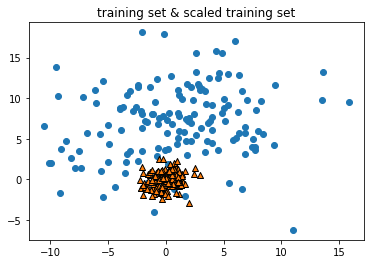

In [3]:
plt.scatter(x_train[:,0], x_train[:,1])
plt.scatter(x_train_scale[:,0], x_train_scale[:,1], marker='^', edgecolors='k')
plt.title('training set & scaled training set')
plt.show()

In [5]:
from sklearn.model_selection import GridSearchCV
params = {'hidden_layer_sizes':[(50,),(100,),(100,100)]
         ,'alpha':[0.0001,0.001,0.01,0.1]}
grid = GridSearchCV(MLPClassifier(max_iter=1600, random_state=38), param_grid=params, cv=3)
grid.fit(x_train_scale, y_train)
grid.best_score_, grid.best_params_

(0.6466666666666666, {'alpha': 0.1, 'hidden_layer_sizes': (50,)})

In [6]:
grid.score(x_test_scale, y_test)

0.46

In [7]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scaler', StandardScaler()),('mlp', MLPClassifier(max_iter=1600, random_state=38))])
pipeline.fit(x_train, y_train)
pipeline.score(x_test, y_test)

0.44

In [9]:
params = {'mlp__hidden_layer_sizes':[(50,),(100,),(100,100)]
         ,'mlp__alpha':[0.0001, 0.001, 0.01, 0.1]}
grid = GridSearchCV(pipeline, param_grid=params, cv=3)
grid.fit(x_train, y_train)
grid.best_score_, grid.best_params_, grid.score(x_test, y_test)

(0.6533333333333333,
 {'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes': (50,)},
 0.46)

In [10]:
pipeline.steps

[('scaler', StandardScaler()),
 ('mlp', MLPClassifier(max_iter=1600, random_state=38))]